In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
drug_consumption_quantified = fetch_ucirepo(id=373) 
  
# data (as pandas dataframes) 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 
feature_names = X.columns.tolist()
  
# metadata 
print(drug_consumption_quantified.metadata) 
  
# variable information 
print(drug_consumption_quantified.variables) 


{'uci_id': 373, 'name': 'Drug Consumption (Quantified)', 'repository_url': 'https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified', 'data_url': 'https://archive.ics.uci.edu/static/public/373/data.csv', 'abstract': 'Classify type of drug consumer by personality data', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1885, 'num_features': 12, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender', 'Education Level', 'Nationality', 'Ethnicity'], 'target_col': ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5TC7S', 'creators': ['Elaine Fehrman', 'Vincent Egan', 'Evgeny Mirkes'], 'intro_paper': {'ID': 413, 

In [2]:
feature_names

['age',
 'gender',
 'education',
 'country',
 'ethnicity',
 'nscore',
 'escore',
 'oscore',
 'ascore',
 'cscore',
 'impuslive',
 'ss']

In [3]:
import pandas as pd


bins = pd.qcut(X['age'], q=20, labels=False, duplicates='drop')

# Create an empty list to hold the grouped data
grouped_data = []

# Iterate over each bin (0 to 19), and select samples that belong to that bin
for i in range(len(set(bins))):  # Use the unique values in 'bins' for iterations
    group = X[bins == i]  # Select all rows in the current bin
    grouped_data.append(group.drop(columns=['age']).to_numpy())



In [4]:
feature_names.remove('age')

In [5]:
datasets = grouped_data

In [6]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [7]:
classifier = OneClassSMMClassifier(nu=0.2)

In [8]:
classifier.fit(datasets)

In [9]:
datasets

[array([[-0.48246,  1.98437,  0.96082, ..., -0.14277, -0.71126, -0.21575],
        [ 0.48246,  1.16365,  0.96082, ...,  0.58489, -1.37983, -1.18084],
        [ 0.48246,  0.45468,  0.96082, ...,  1.81175,  0.19268,  0.07987],
        ...,
        [ 0.48246,  0.45468, -0.57009, ..., -1.38502,  0.52975, -0.52593],
        [ 0.48246, -0.61113, -0.57009, ..., -2.57309,  1.29221,  1.2247 ],
        [-0.48246, -0.61113,  0.21128, ...,  0.41594,  0.88113,  1.2247 ]]),
 array([[ 0.48246, -0.05921,  0.96082, ..., -0.00665, -0.21712, -1.18084],
        [-0.48246, -0.05921,  0.96082, ..., -1.0145 , -1.37983,  0.40148],
        [ 0.48246,  1.98437,  0.96082, ...,  1.30612, -0.21712, -0.21575],
        ...,
        [-0.48246, -1.7379 , -0.57009, ..., -0.14277, -0.21712, -0.84637],
        [-0.48246, -0.05921, -0.28519, ...,  0.12331, -0.71126,  0.40148],
        [-0.48246, -0.61113, -0.28519, ...,  0.12331, -0.21712,  0.7654 ]]),
 array([[-0.48246,  1.16365, -0.57009, ...,  0.93949, -0.21712,  0.079

In [10]:
decision, y_pred = classifier.predict(datasets)

In [ ]:
y_pred

array([ 1.,  1.,  1., -1., -1.])

In [ ]:
decision

array([ 95.54467428,  16.82717277,   6.91182552, -40.3693588 ,
       -78.91431377])

In [11]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[0, 4]

In [12]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**datasets[0].shape[1])

c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
c:\Users\swath\Documents\CISPA\OCSVM-SHAP\src\utils\shapley_procedure\coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 2047/2047 [03:13<00:00, 10.59it/s]


In [13]:
mean_stochastic_shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [14]:
feature_names

['gender',
 'education',
 'country',
 'ethnicity',
 'nscore',
 'escore',
 'oscore',
 'ascore',
 'cscore',
 'impuslive',
 'ss']

In [15]:
mean_stochastic_shapley_values

tensor([[ 6.1641e-04,  3.1260e-03,  1.9982e-03,  5.5709e-04,  3.3148e-04],
        [-1.2542e-03,  3.7940e-03,  2.3943e-03,  3.4058e-03, -1.6957e-03],
        [-1.5719e-03,  2.8441e-03,  2.2155e-03,  2.1654e-03,  1.0049e-03],
        [ 1.1679e-03,  1.5367e-03,  1.4780e-03,  1.1485e-03,  1.3259e-03],
        [ 2.9970e-04,  2.1066e-03,  2.1484e-03,  2.0202e-03,  9.2553e-05],
        [ 7.8641e-04,  1.5702e-03,  2.2155e-03,  2.2548e-03, -1.8096e-04],
        [-1.0563e-03,  3.2688e-03,  2.7742e-03,  2.4560e-03, -7.7693e-04],
        [ 5.5864e-04,  2.6653e-03,  1.7461e-03,  2.3219e-03, -6.4672e-04],
        [ 5.4440e-04,  2.0280e-03,  1.6676e-03,  2.4555e-03, -3.3592e-05],
        [ 7.6332e-04,  1.7822e-03,  1.4777e-03,  1.6176e-03,  1.0411e-03],
        [-6.2795e-04,  2.1733e-03,  1.7570e-03,  3.7627e-03, -3.5367e-04]])

The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3618.)


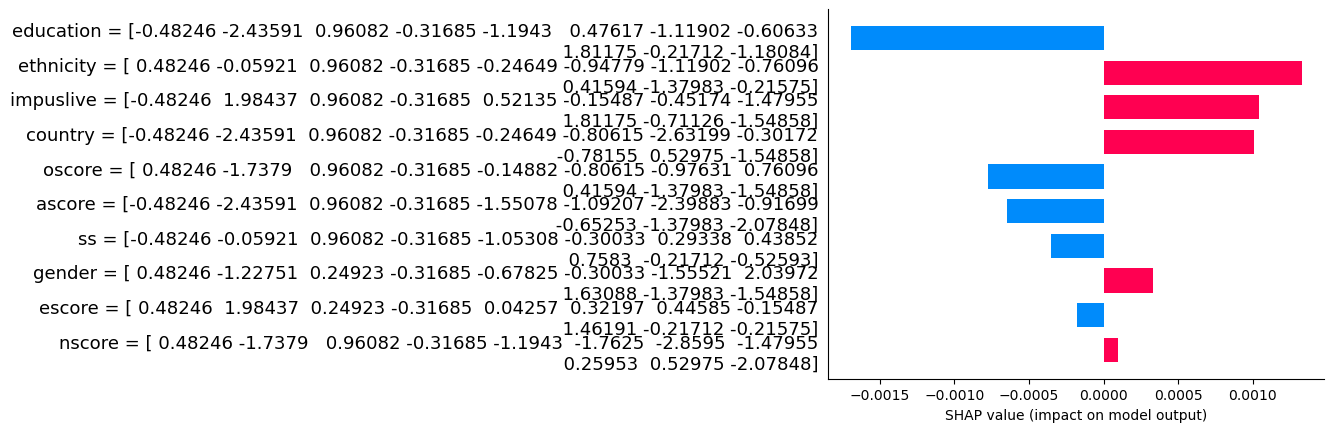

In [17]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot
bar_plot(mean_stochastic_shapley_values.T[4], datasets[4], feature_names=feature_names)

If there is no one highest contributing feature, it means some form of feature interaction between the high contributing features are rerseponsible for the group becoming an outlier. 

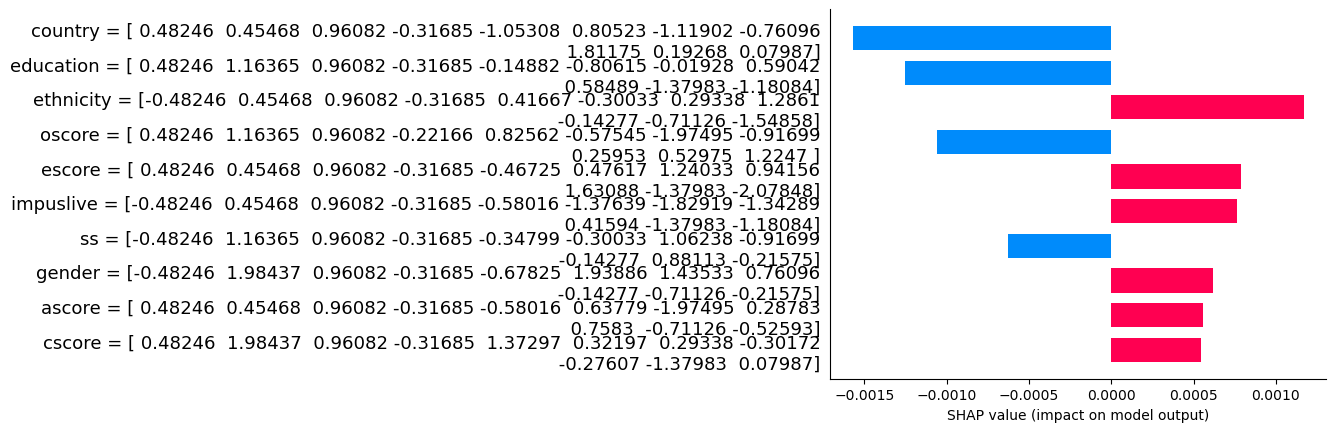

In [18]:
bar_plot(mean_stochastic_shapley_values.T[0], datasets[0], feature_names=feature_names)

In [ ]:

X_scaled_df = pd.DataFrame(X, columns=X.columns)

grouped_data = []

for i, (_, group) in enumerate(X_scaled_df.groupby('largest spot size')):
    group_data = group.drop(columns=['largest spot size']).to_numpy()
    artificial_feature = np.ones((group_data.shape[0],1))  # Default value = 1
    if i == 0:  # and group has anomolous a_f
        artificial_feature.fill(20)
    
    group_data = np.hstack((group_data, artificial_feature))  # Append feature
    grouped_data.append(group_data)

In [ ]:
feature_names.append('artificial_feature')

In [ ]:
feature_names

['modified Zurich class',
 'spot distribution',
 'activity',
 'evolution',
 'previous 24 hour flare activity',
 'historically-complex',
 'became complex on this pass',
 'area',
 'area of largest spot',
 'artificial_feature']

In [ ]:
datasets = grouped_data

In [ ]:
datasets

[array([[ 2.,  2.,  1., ...,  1.,  2., 20.],
        [ 2.,  2.,  1., ...,  1.,  2., 20.],
        [ 2.,  2.,  1., ...,  1.,  1., 20.],
        ...,
        [ 3.,  1.,  1., ...,  1.,  1., 20.],
        [ 3.,  2.,  1., ...,  1.,  1., 20.],
        [ 3.,  1.,  2., ...,  1.,  1., 20.]]),
 array([[1., 1., 1., 3., 1., 1., 2., 1., 2., 1.],
        [5., 3., 1., 2., 1., 2., 2., 1., 1., 1.],
        [5., 3., 1., 3., 1., 1., 2., 1., 2., 1.],
        [2., 2., 1., 2., 1., 1., 2., 1., 2., 1.],
        [1., 1., 2., 3., 1., 1., 2., 1., 2., 1.],
        [1., 1., 2., 2., 3., 1., 2., 1., 2., 1.],
        [2., 1., 1., 3., 1., 1., 2., 1., 2., 1.],
        [2., 1., 2., 3., 3., 2., 2., 1., 2., 1.],
        [1., 1., 1., 2., 1., 2., 2., 1., 2., 1.],
        [1., 2., 1., 2., 1., 2., 2., 1., 2., 1.],
        [5., 3., 1., 3., 1., 1., 2., 1., 2., 1.],
        [5., 3., 1., 2., 1., 1., 1., 1., 1., 1.],
        [5., 3., 1., 3., 1., 1., 1., 1., 1., 1.],
        [1., 2., 1., 3., 1., 1., 2., 1., 1., 1.],
        [5., 3.

In [ ]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [ ]:
classifier = OneClassSMMClassifier(nu=0.7)

In [ ]:
classifier.fit(datasets)

In [ ]:
decision, y_pred = classifier.predict(datasets)

In [ ]:
y_pred

array([-1.,  1.,  1.,  1.,  1., -1.])

In [ ]:
decision

array([-0.22632335,  0.09101987,  0.01904001,  0.09738231,  0.05335713,
       -0.03447597])

In [ ]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[0, 5]

In [ ]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

divide by zero encountered in log2
invalid value encountered in cast
invalid value encountered in log2
100%|██████████| 1023/1023 [00:30<00:00, 33.56it/s]


In [ ]:
mean_stochastic_shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [ ]:
mean_stochastic_shapley_values

tensor([[-3.4004e-02,  1.7807e-02, -4.2919e-03,  4.1597e-02,  6.6850e-03,
         -2.7221e-02],
        [-4.6652e-02,  1.4458e-02,  3.1791e-03,  1.9306e-02,  2.3699e-02,
         -1.3931e-02],
        [-1.2206e-02,  1.9400e-03, -2.9828e-03,  7.2201e-03,  2.1160e-03,
          3.7021e-03],
        [-1.1257e-02,  1.1005e-02, -9.0708e-05,  3.9827e-03, -3.3444e-03,
         -7.2235e-04],
        [-7.8898e-03,  2.5443e-03,  3.1683e-03,  1.1770e-03,  4.3254e-04,
          6.3735e-04],
        [-1.7127e-02,  3.6235e-03, -3.7705e-03,  1.0069e-02,  4.7571e-04,
          6.7884e-03],
        [-5.2135e-03,  5.0048e-03, -3.6303e-03,  5.4664e-05,  1.3015e-02,
         -9.3770e-03],
        [-5.8178e-03, -2.8513e-03,  5.6395e-03,  1.3496e-03,  9.7210e-04,
          8.7476e-04],
        [-1.4882e-02,  1.2256e-02,  6.2974e-03,  7.0211e-04, -1.9335e-04,
         -4.2833e-03],
        [-7.1166e-02,  2.4989e-02,  1.5675e-02,  1.1579e-02,  9.8636e-03,
          9.2268e-03]])

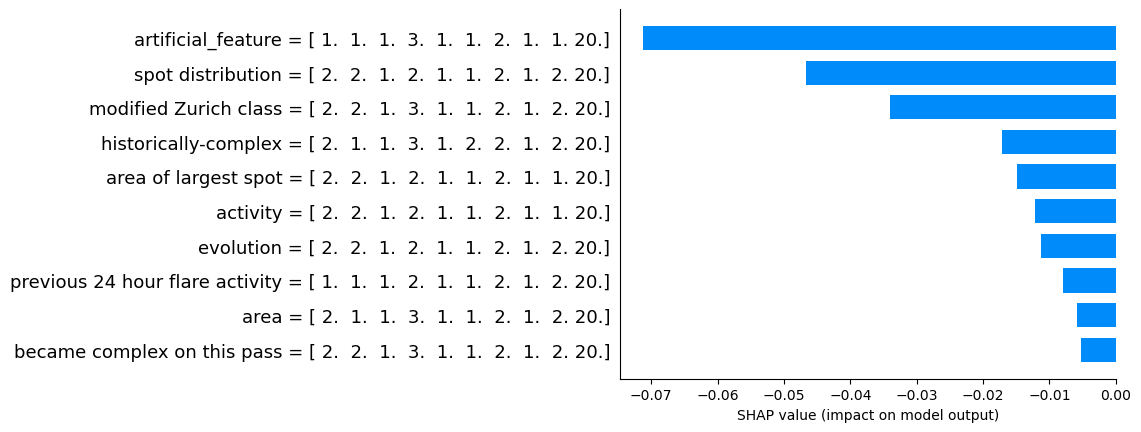

In [ ]:
from src.utils.visualisation.deterministic_values import summary_plot, bar_plot
bar_plot(mean_stochastic_shapley_values.T[0], datasets[0], feature_names=feature_names)